In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

data = yf.download("^NSEI")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2024-10-07,25084.099609,25143.000000,24694.349609,24795.750000,24795.750000,374300
2024-10-08,24832.199219,25044.000000,24756.800781,25013.150391,25013.150391,333200
2024-10-09,25065.800781,25234.050781,24947.699219,24981.949219,24981.949219,290600


In [3]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
2007-09-24,4837.149902,4941.149902,4837.149902,4932.200195,4932.200195,0
2007-09-25,4939.100098,4953.899902,4878.149902,4938.850098,4938.850098,0
2007-09-26,4937.600098,4980.850098,4930.350098,4940.500000,4940.500000,0
2007-09-27,4942.700195,5016.399902,4942.700195,5000.549805,5000.549805,0


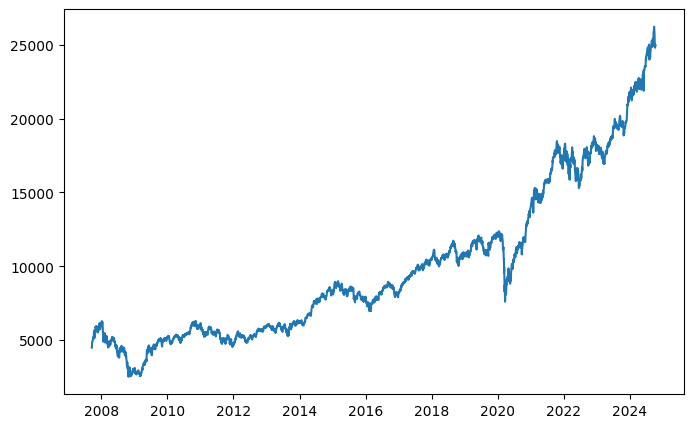

In [6]:
plt.figure(figsize=(8,5))
plt.plot(data['Close'], label='Close Price history')

In [7]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [8]:
x = data[['Open - Close', 'High - Low']]
x.head()

,Open - Close,High - Low
Date,,
2007-09-17,23.800293,66.199707
2007-09-18,-52.100098,70.250000
2007-09-19,-182.100098,188.750000
2007-09-20,-12.699707,39.700195
2007-09-21,-84.599609,122.000000


In [9]:
Yout = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

In [10]:
Yout

array([ 1,  1,  1, ...,  1, -1, -1])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Yout, test_size=0.2, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [13]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

model.fit(x_train, y_train)

accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print('Accuracy train: {}'.format(accuracy_train))
print('Accuracy test: {}'.format(accuracy_test))


Accuracy train: 0.66507319988049
Accuracy test: 0.5256869772998806


In [14]:
print('Best score: {}'.format(model.best_score_))
print('Best parameters: {}'.format(model.best_params_))

Best score: 0.5246476139481964
Best parameters: {'n_neighbors': 7}


In [15]:
prediction_classification = model.predict(x_test)

In [16]:
actual_predicted_data = pd.DataFrame({'Actual': y_test, 'Predicted': prediction_classification})
actual_predicted_data

,Actual,Predicted
0,-1,1
1,-1,1
2,1,1
3,1,-1
4,-1,-1
...,...,...
832,1,-1
833,-1,-1
834,1,1
835,-1,1


In [17]:
actual_predicted_data.head(10)

,Actual,Predicted
0,-1,1
1,-1,1
2,1,1
3,1,-1
4,-1,-1
5,-1,1
6,1,1
7,1,-1
8,-1,1
9,1,1


In [18]:
y = data['Close']
y

,Close
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805
...,...
2024-10-07,24795.750000
2024-10-08,25013.150391
2024-10-09,24981.949219


**Implemenation of KNN Regression**

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import neighbors

In [20]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.2, random_state=42)

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

model_reg.fit(X_train_reg, y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [21]:
print(predictions)

[ 9384.56555176  8686.1812439  11280.93759155 14598.85314941
 10044.18753052 14641.32507324 10893.66879272  7670.65621948
  6762.75314331  7076.32492065 10151.14682007  7894.92810059
  8720.92504883  6307.78434753  8010.26570129 15074.83743286
  6440.24687195  8294.55004883  8572.07194519  6443.359375
  7944.77191162 11475.98141479  7473.2250061   7159.63439941
  7643.97808838  8417.55621338  6625.54690552  7197.9312439
  6883.13432312  9456.48745728  6422.68128967  6360.08442688
  6671.06564331  7151.29992676  6475.28753662  9218.12182617
 13113.21859741 14238.91864014  8057.49676514 12015.77807617
  9390.89067078 10411.20631409 13902.54998779  7181.85626221
 12737.19992065 13616.92486572  7275.96875    10637.5562439
 14519.79998779  8022.37811279  7725.13745117  7669.48129272
 10416.47499084  8102.10314941 13855.77804565 10956.08435059
  7484.26245117  7997.49685669  9464.25010681  7264.69067383
 10383.81240845 13930.05935669  6260.99688721  9524.60009766
 15606.32501221 10803.618896

In [22]:
rms = np.sqrt(mean_squared_error(y_test_reg, predictions))
print(rms)

4945.096152221985


In [23]:
valid = pd.DataFrame({'Actual': y_test_reg, 'Predicted': predictions})
valid.head(20)

,Actual,Predicted
Date,,
2013-06-03,5939.299805,9384.565552
2009-10-23,4997.049805,8686.181244
2018-01-19,10894.700195,11280.937592
2008-02-04,5463.500000,14598.853149
2015-05-29,8433.650391,10044.187531
2008-02-21,5191.799805,14641.325073
2022-11-21,18159.949219,10893.668793
2018-08-07,11389.450195,7670.656219
2015-10-27,8232.900391,6762.753143
